<a href="https://colab.research.google.com/github/shweth5data/1-Seoul-Bike-Sharing-Demand-Prediction/blob/main/day2_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Statement </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - 1 = Winter,2 = Spring, 3 = Fall, 4 = Summer
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [9]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
from datetime import date

sns.set_style('darkgrid')
# Importing Minmaxscaler to scale data
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Import the Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# importing library called warning to ignore warnings.
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [10]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# load & save data
data=pd.read_csv('/SeoulBikeData (1).csv',encoding='latin-1')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# creating copy so as to not disturb original dataset
df=data.copy()

### Dataset First View

In [14]:
# checking top 5 rows
df.head().T

,0,1,2,3,4
Date,1/12/2017,1/12/2017,1/12/2017,1/12/2017,1/12/2017
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0


In [15]:
# checking bottom 5 rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [16]:
# checking random samples of data
df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2339,8/3/2018,290,11,4.5,82,2.0,1226,1.6,0.73,0.0,0.0,Spring,No Holiday,Yes
5024,28/06/2018,2288,8,24.2,73,1.0,1581,19.0,0.96,0.0,0.0,Summer,No Holiday,Yes
2135,27/02/2018,310,23,5.3,53,1.5,582,-3.5,0.00,0.0,0.0,Winter,No Holiday,Yes
5694,26/07/2018,602,6,27.4,77,0.7,1113,23.0,0.00,0.0,0.0,Summer,No Holiday,Yes
3845,10/5/2018,0,5,11.5,80,0.9,974,8.1,0.00,0.0,0.0,Spring,No Holiday,No


### Dataset Rows & Columns count

In [17]:
# rows & columns of data
df.shape

(8760, 14)

In [18]:
# total datapoints
df.size

122640

### Dataset Information

In [19]:
# checking Non-null & datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [20]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [21]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

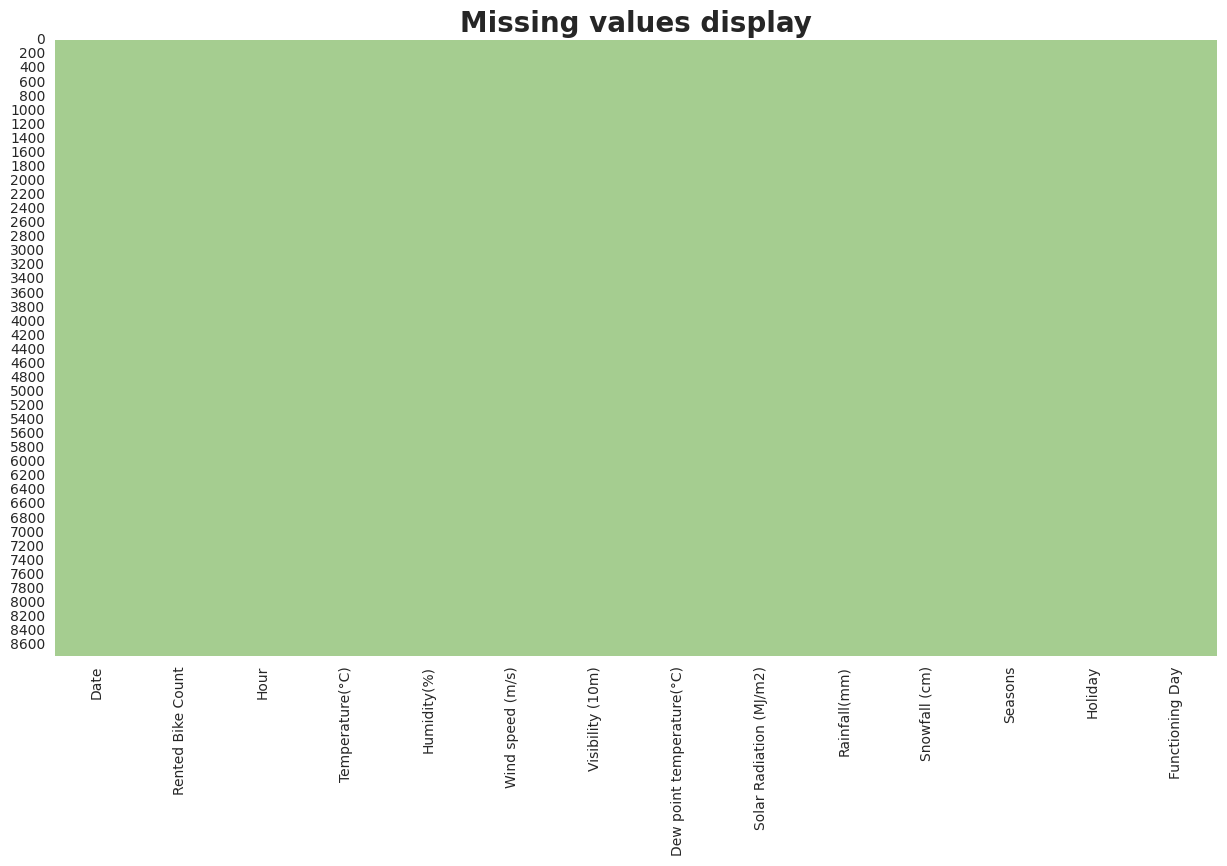

In [22]:
# Heatmap to see null values in dataset

plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),cbar=False,cmap="crest")
plt.title('Missing values display',fontsize=20,fontweight="bold")
plt.show()

### What did you know about your dataset?

In our Dataset 8760 Rows and 14 Coloums

No null values found in our Dataset

We will change the Datatypes of date column from object to date_time format.

We will convert datatypes of Functioning Day , Season ,Holidays & Hour from object type to categorical data , which help in Machine learning algos.

## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns
df.columns.to_list()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [24]:
# Dataset Describe
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.60,645.00,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.50,6.92,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.88,11.94,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.23,20.36,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.72,1.04,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.83,608.30,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.07,13.06,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.57,0.87,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.15,1.13,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.08,0.44,0.0,0.00,0.00,0.00,8.80


In [25]:
df.describe(include='O').T

,count,unique,top,freq
Date,8760,365,1/12/2017,24
Seasons,8760,4,Spring,2208
Holiday,8760,2,No Holiday,8328
Functioning Day,8760,2,Yes,8465


### Variables Description

Unique values in Season = 4 i.e Spring ,Summer, Winter, Fall .Highest repeated Season is Spring i.e 2208.

Holiday having 2 unique values i.e Holiday , No-Holiday. Highest repeated is No-Holiday 8328.

Functioning day having 2 unique values i.e Yes, No.

Max Rented bike count is 3356 and Min is 0.

### Check Unique Values for each variable.

In [26]:
# Check Unique Values for each variable. So that if some wrong entries like #,@,%,?,+,& in string or in integer type coloumn that we are unable to find during null value detection.
for num,col in enumerate(df.columns,1):
    print('\n')
    print(num,')\n','{} : {}'.format(col,df[col].unique().tolist()))



1 )
 Date : ['1/12/2017', '2/12/2017', '3/12/2017', '4/12/2017', '5/12/2017', '6/12/2017', '7/12/2017', '8/12/2017', '9/12/2017', '10/12/2017', '11/12/2017', '12/12/2017', '13/12/2017', '14/12/2017', '15/12/2017', '16/12/2017', '17/12/2017', '18/12/2017', '19/12/2017', '20/12/2017', '21/12/2017', '22/12/2017', '23/12/2017', '24/12/2017', '25/12/2017', '26/12/2017', '27/12/2017', '28/12/2017', '29/12/2017', '30/12/2017', '31/12/2017', '1/1/2018', '2/1/2018', '3/1/2018', '4/1/2018', '5/1/2018', '6/1/2018', '7/1/2018', '8/1/2018', '9/1/2018', '10/1/2018', '11/1/2018', '12/1/2018', '13/01/2018', '14/01/2018', '15/01/2018', '16/01/2018', '17/01/2018', '18/01/2018', '19/01/2018', '20/01/2018', '21/01/2018', '22/01/2018', '23/01/2018', '24/01/2018', '25/01/2018', '26/01/2018', '27/01/2018', '28/01/2018', '29/01/2018', '30/01/2018', '31/01/2018', '1/2/2018', '2/2/2018', '3/2/2018', '4/2/2018', '5/2/2018', '6/2/2018', '7/2/2018', '8/2/2018', '9/2/2018', '10/2/2018', '11/2/2018', '12/2/2018', 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [27]:
# get sum of missing values in every column
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [28]:
# sum of duplicated rows in dataset
df.duplicated().sum()

0

In [29]:
# extracting day,month,year from date
from datetime import date
df['Date']=pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df['day_name']=df['Date'].dt.day_name()

In [30]:
# Convert Hour in Object form
df['Hour']=df['Hour'].astype('object')


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   object        
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

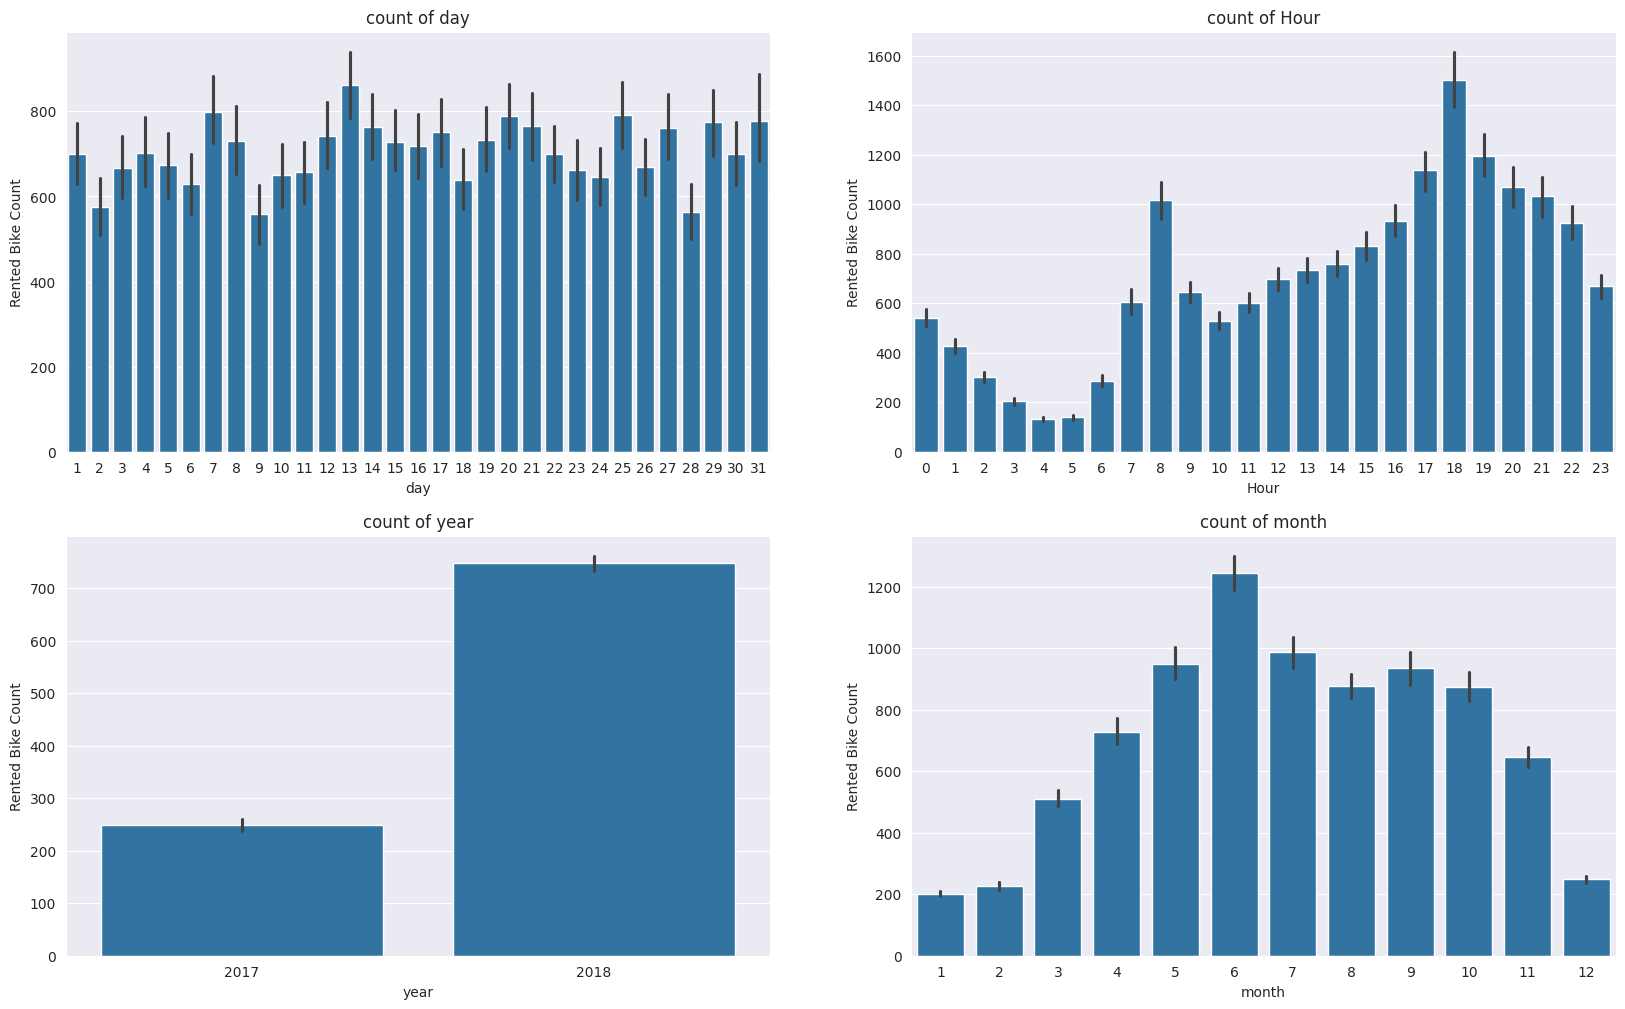

In [32]:
# Bar plot for Daily, Hourly, monthly & yearly Rented Bike count
cols = ['day','Hour','year','month']

n=1
plt.figure(figsize=(20,12))
for i in cols:
  plt.subplot(2,2,n)
  n=n+1
  sns.barplot(data=df,x=i,y='Rented Bike Count')
  plt.title(f"count of {i}")
plt.show()

1. 	**Hourly : high demand at 8am & 6pm**
2. 	**Daily : less rentend bike count in 1st 2nd day of month and gradually increases for week and in range of 600-800**
3.	**Monthly : Summer season has high rented bike count and winter has least rented bike count.**
4.	**Yearly : year 2017 has less  rented bike count & demand increased in 2018**


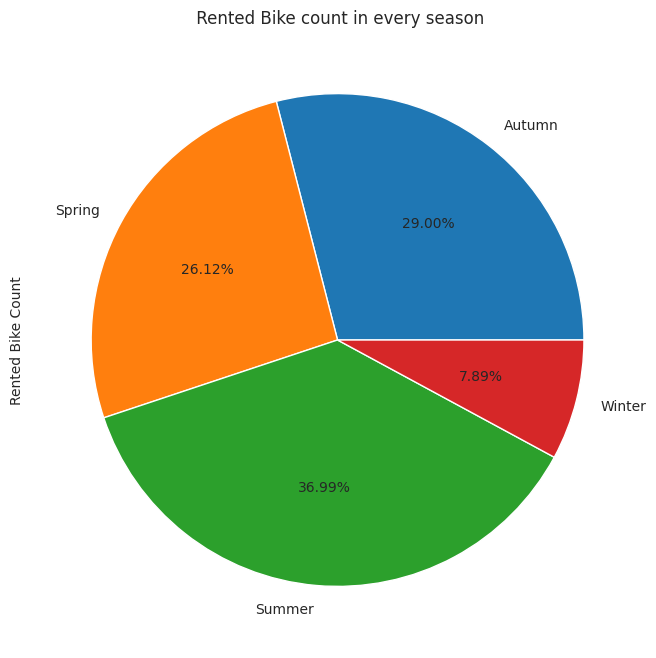

In [33]:
# Rented Bike count in every season
plt.figure(figsize=(8,8))
df.groupby('Seasons')['Rented Bike Count'].sum().plot.pie(autopct="%.2f%%")
plt.title(' Rented Bike count in every season')
plt.show()

**As seen earlier demand for rented bike is high in summer 36.99%  
Demand is least in winter only 7.8%**


In [34]:
df.groupby('Hour')['Solar Radiation (MJ/m2)'].sum()

Hour
0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
5       0.00
6       2.33
7      34.30
8     129.56
9     281.03
10    448.01
11    578.64
12    665.07
13    691.83
14    653.35
15    570.77
16    443.44
17    290.87
18    143.65
19     47.60
20      4.96
21      0.00
22      0.00
23      0.00
Name: Solar Radiation (MJ/m2), dtype: float64

**Hourly Solar radiation Season wise**

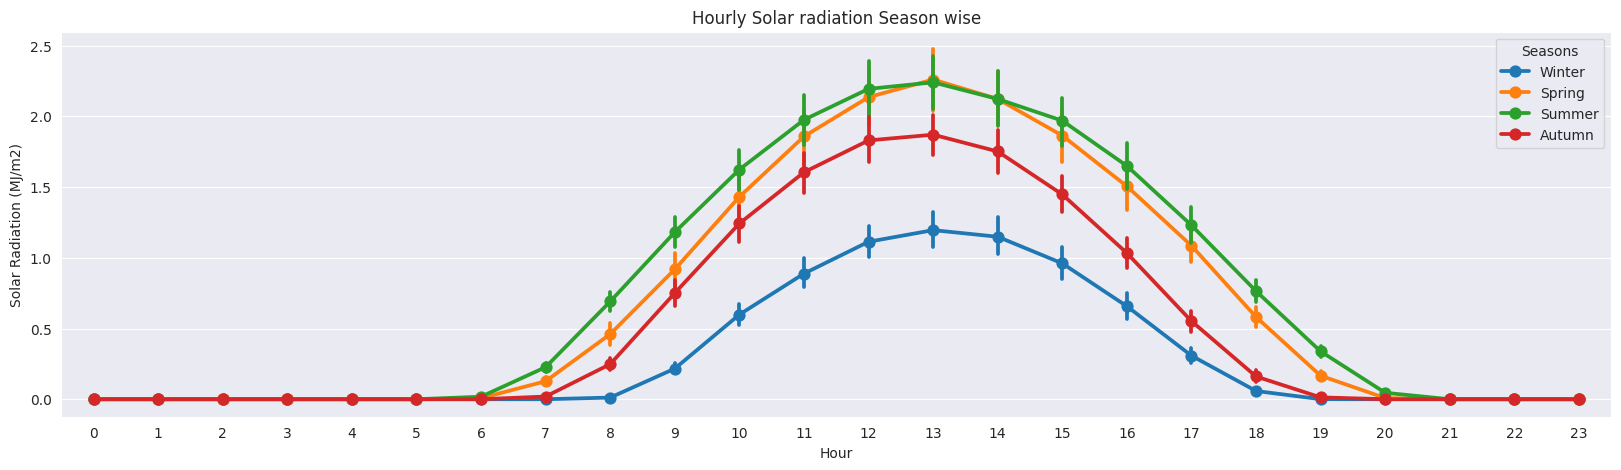

In [35]:
plt.figure(figsize=(20,5))
#df.groupby('Hour').sum()['Solar Radiation (MJ/m2)'].plot(kind='bar', color='red')
sns.pointplot(x='Hour',y='Solar Radiation (MJ/m2)',hue='Seasons',data=df)
plt.title('Hourly Solar radiation Season wise')
plt.show()


**Solar radiations are at peak at 1pm
And hourly interval of solar radiation seen for every season**


In [36]:
df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

**Rented Bike count on functioing day**

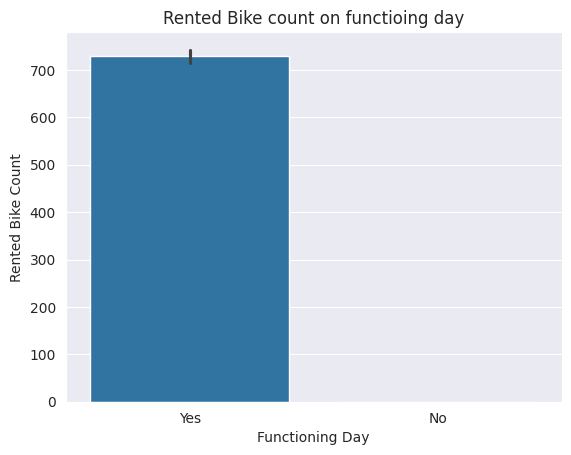

In [37]:
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count')
plt.title('Rented Bike count on functioing day')
plt.show()

**Rented Bike count on Holiday-non Holiday**

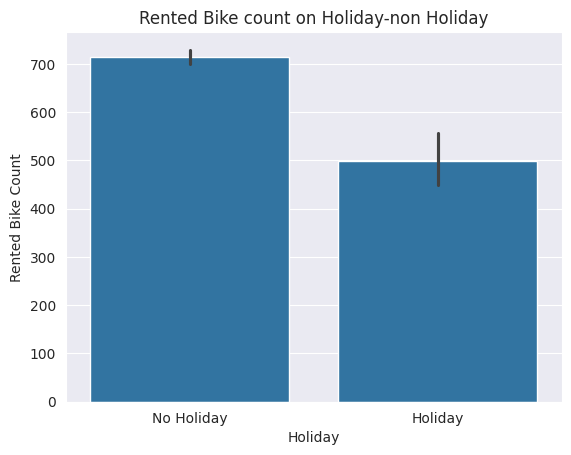

In [38]:
sns.barplot(data=df,x='Holiday',y='Rented Bike Count')
plt.title('Rented Bike count on Holiday-non Holiday')
plt.show()

**No holiday has more rented bike count, this may indicates that customer uses bike on working day
for travelling at workplace more than used on Holidays**



**Hourly distribution of Rented bike count on Holiday & non holiday**

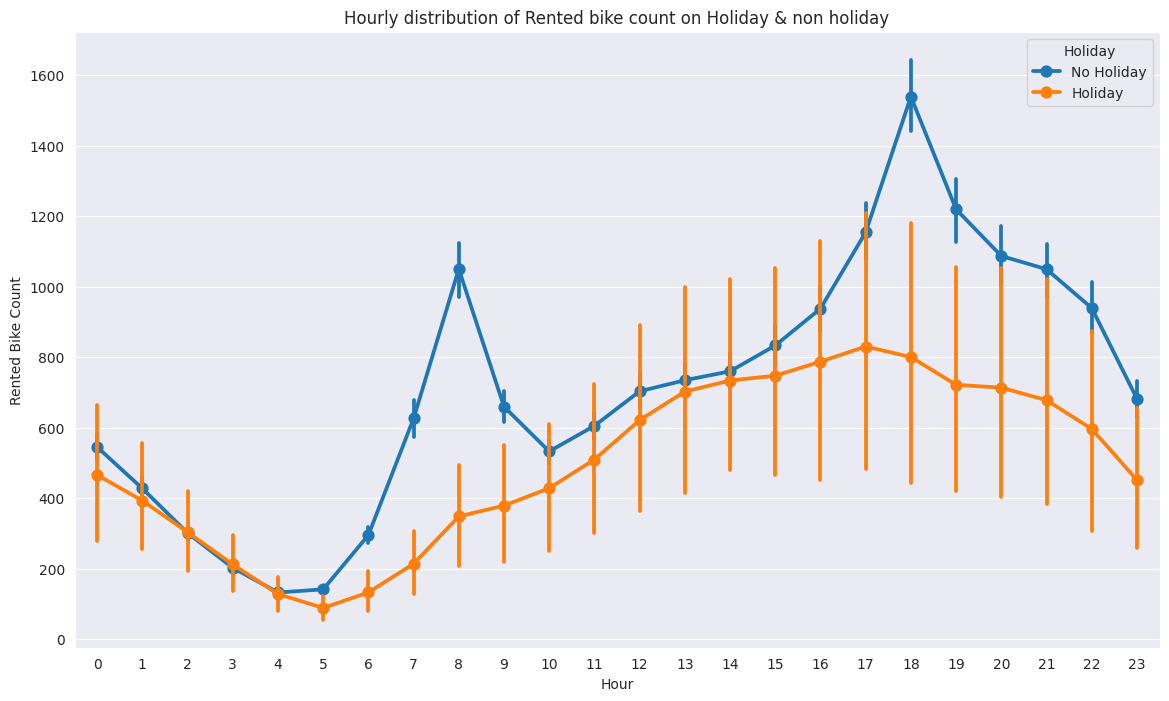

In [39]:
plt.figure(figsize=(14,8))
sns.pointplot(data=df,y='Rented Bike Count',x='Hour',hue='Holiday')
plt.title('Hourly distribution of Rented bike count on Holiday & non holiday')
plt.show()

**We can see peak from 7-9 am & (17-20) 5-8pm on NO holiday which indicates high demand period in daily time for rented bikes**

**Rented Bike count in every season hourly distribution**

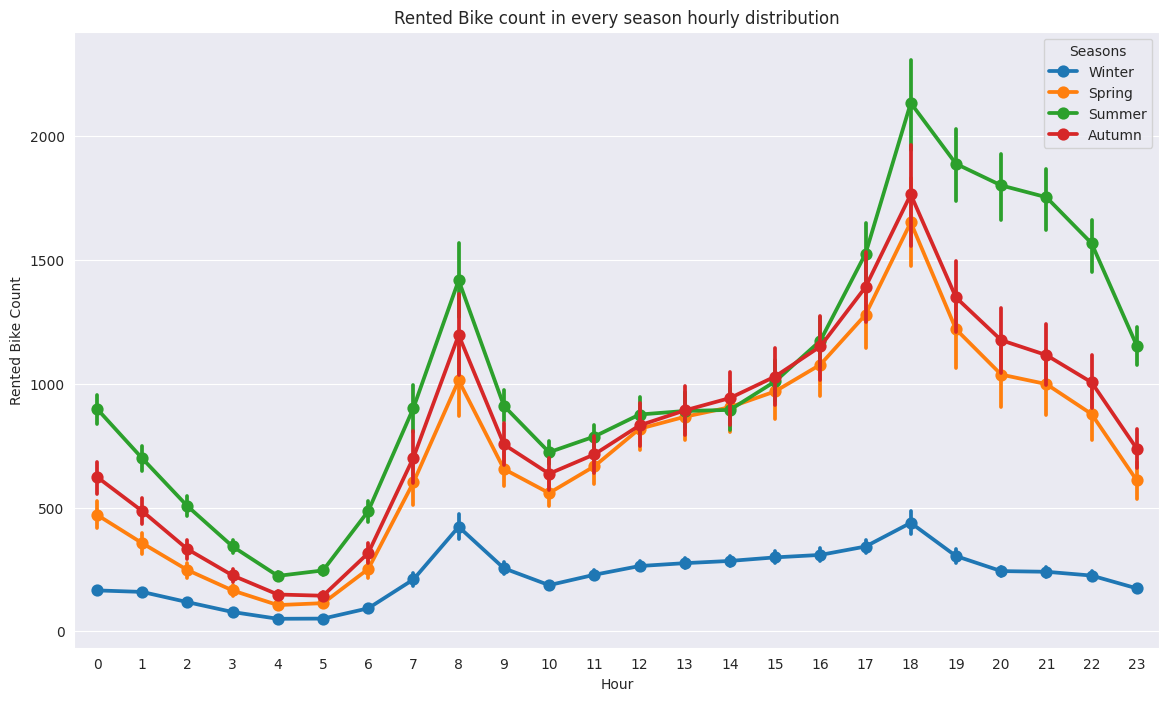

In [40]:
plt.figure(figsize=(14,8))
sns.pointplot(data=df,y='Rented Bike Count',x='Hour',hue='Seasons')
plt.title('Rented Bike count in every season hourly distribution')
plt.show()

**Similar hourly pattern seen in every season so need of bike availability can be identified on hour basis. Irrespective of season peak is seen at 8am & 6pm**


<Axes: xlabel='month', ylabel='Rented Bike Count'>

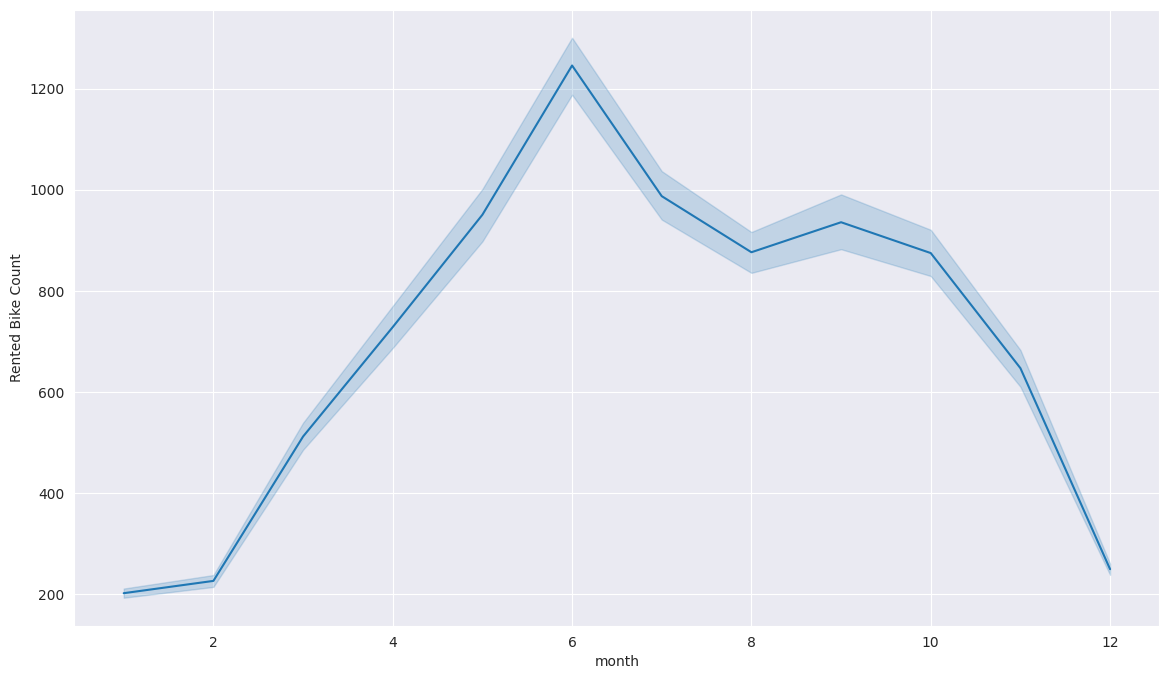

In [41]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df,y='Rented Bike Count',x='month')

**Regplot – Relationship between Rental Bike count & numerical  variables**

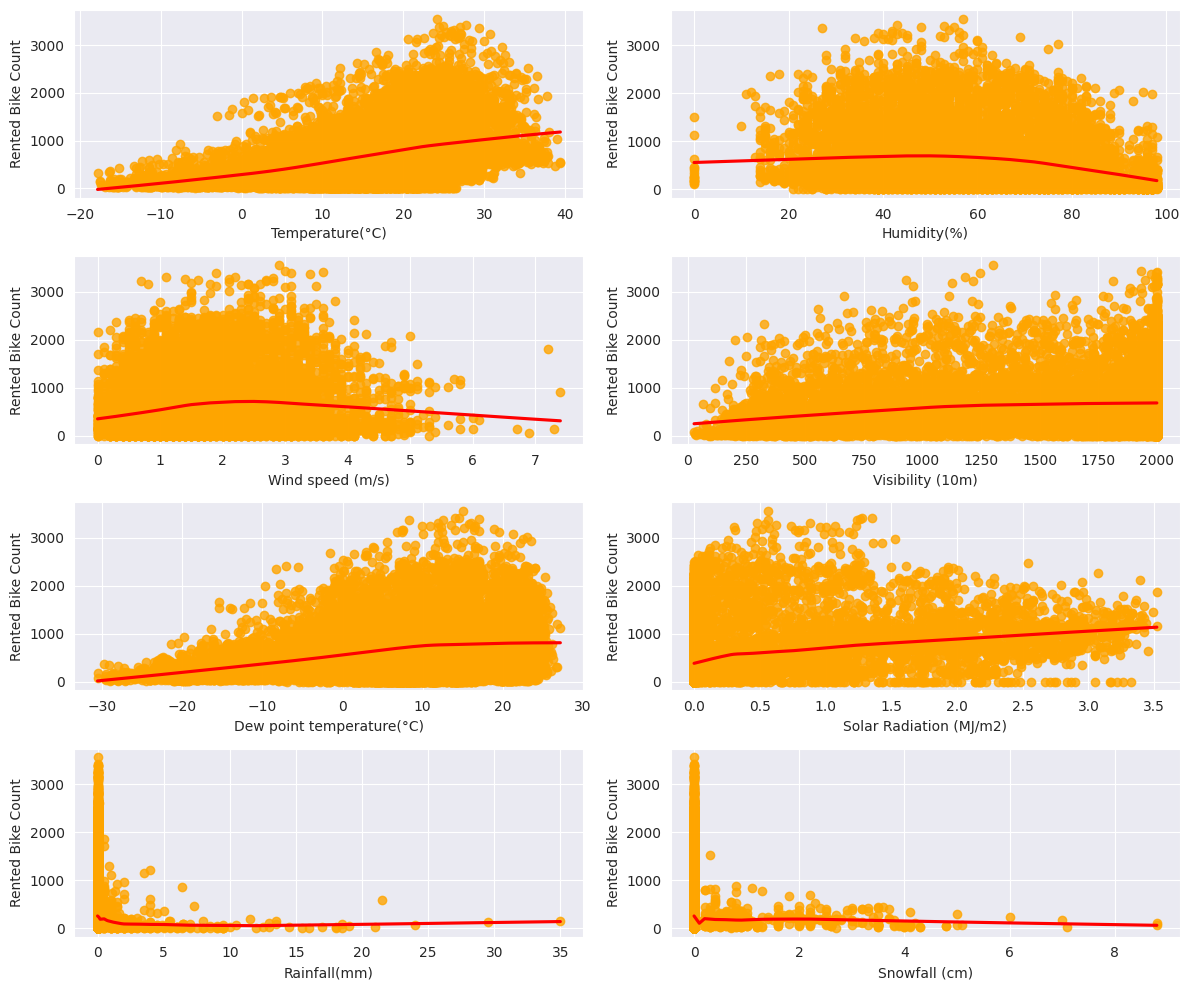

In [42]:
numrical_var=['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

plt.figure(figsize=(12,10))
n=1
for i in numrical_var:
  plt.subplot(4,2,n)
  n += 1
  sns.regplot(x=df[i],y=df['Rented Bike Count'],scatter_kws={"color": "orange"}, line_kws={"color": "red"},lowess=True)
  plt.tight_layout()

**This regression plots shows that some of our features are positive linear and some are negative linear in relation to our target variable.**

